In [3]:
!nvidia-smi


Mon Apr  1 00:21:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  |   00000000:0A:00.0  On |                  N/A |
|  0%   40C    P8             18W /  280W |     966MiB /  11264MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from cnn import CNN

In [5]:
print(torch.cuda.get_device_name())
print(torch.__version__)
print(torch.version.cuda)
x = torch.randn(1).cuda()
print(x)

NVIDIA GeForce GTX 1080 Ti
2.2.2+cu121
12.1
tensor([0.5898], device='cuda:0')


In [3]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

train_dataset = datasets.ImageFolder(root='./data/train_images', transform=transform)

In [4]:
batch_size = 64
num_classes = 16
learning_rate = 0.001
epochs = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
model = CNN(num_classes)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

hello world


In [9]:

stuff = next(iter(train_loader))

In [10]:
len(stuff)

2

In [12]:
for epoch in range(epochs):
        for i, (X, y) in enumerate(train_loader):
            X = X.to(device)
            y = y.to(device)

            y_hat = model(X)
            loss = criterion(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch: {epoch}/{epochs} | Loss: {loss.item()}")

Epoch: 0/100 | Loss: 0.011013511568307877
Epoch: 1/100 | Loss: 0.013016574084758759
Epoch: 2/100 | Loss: 0.0030471468344330788
Epoch: 3/100 | Loss: 0.002511617261916399
Epoch: 4/100 | Loss: 0.001695512910373509
Epoch: 5/100 | Loss: 0.0012688429560512304
Epoch: 6/100 | Loss: 0.001855165115557611
Epoch: 7/100 | Loss: 0.0014490571338683367
Epoch: 8/100 | Loss: 0.0007839398458600044
Epoch: 9/100 | Loss: 0.00045531016075983644
Epoch: 10/100 | Loss: 0.001208534580655396
Epoch: 11/100 | Loss: 0.0006764867575839162
Epoch: 12/100 | Loss: 0.0004124620172660798
Epoch: 13/100 | Loss: 0.0006756765069440007
Epoch: 14/100 | Loss: 0.000395368377212435
Epoch: 15/100 | Loss: 0.0017528976313769817
Epoch: 16/100 | Loss: 0.0006483591860160232
Epoch: 17/100 | Loss: 0.00036375594208948314
Epoch: 18/100 | Loss: 0.0006757167284376919
Epoch: 19/100 | Loss: 0.0003619455674197525
Epoch: 20/100 | Loss: 0.00024890981148928404
Epoch: 21/100 | Loss: 0.00023950317699927837
Epoch: 22/100 | Loss: 0.0004267044714652002
E

In [ ]:
model.to('cpu')
torch.save(model,'./model')

In [6]:
loaded_model = torch.load('./model')

In [7]:
test_dataset = datasets.ImageFolder(root='./data/test_images', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [10]:
correct = 0
total = 0
loaded_model.to(device)
loaded_model.eval()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1), padding=(3, 3))
  (conv4): Conv2d(64, 64, kernel_size=(9, 9), stride=(1, 1), padding=(3, 3))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=246016, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=16, bias=True)
)

In [12]:
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        outputs = loaded_model(X_test)
        _, predicted = torch.max(outputs.data, 1)

        total += y_test.size(0)

        correct += (predicted == y_test).sum().item()


accuracy = 100 * correct / total
print(f'Accuracy of the CNN on the test data is: {accuracy:.2f}%')

Accuracy of the CNN on the test data is: 57.94%


In [13]:
from PIL import Image

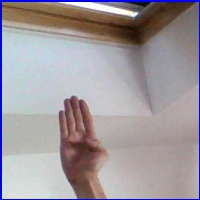

In [44]:
test_image_path = 'full_Images\B\B1532.jpg'
test_image = Image.open(test_image_path)
test_image

In [45]:
input_tensor = transform(test_image).unsqueeze(0)
input_tensor = input_tensor.to(device)
with torch.no_grad():
    output = loaded_model(input_tensor)


softmax = torch.nn.Softmax(dim=1)
probabilities = softmax(output)
output_numpy = output.cpu().numpy()
print(output_numpy)

[[ 36.984802  30.454441  28.57648  -40.357544 -20.1006    12.797195
  -24.150127  43.803223  15.785039  28.067026  16.378668 -43.757137
   -8.736609 -23.039242 -76.29865   36.771175]]


In [46]:
probabilities = torch.nn.functional.softmax(output, dim=1)
predicted_class = torch.argmax(probabilities, dim=1).item()
print(f"The predicted letter is: {predicted_class}")

The predicted letter is: 7
